In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [6]:
def zero_control(t, x):
    return 0.

def parametrized_pendulum(a, b, u=zero_control):
    def pendulum(t, x):
        return np.array([
            x[1],
            -a * np.sin(x[0]) - b * x[1] + u(t, x)
        ])
    return pendulum

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       9.99799980e+00, 9.99899990e+00, 1.00000000e+01])
 t_events: None
        y: array([[0.        , 0.00100004, 0.00199995, ..., 0.1446575 , 0.1451879 ,
        0.14571816],
       [1.        , 0.99987475, 0.99974901, ..., 0.53040892, 0.5302704 ,
        0.53013164]])


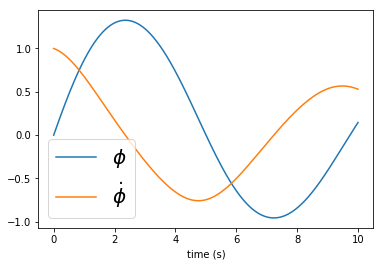

(10000,)

In [7]:
from scipy.integrate import solve_ivp

result = solve_ivp(parametrized_pendulum(0.5, 0.125),np.array([0., 10.]), np.array([0., 1.]),
                   t_eval=np.linspace(0, 10, 10000))
print(result)

plt.plot(result.t, result.y[0], result.t, result.y[1])
plt.legend([r'$\phi$', r'$\dot{\phi}$'], fontsize=20)
plt.xlabel(r'time (s)')
plt.show()
result.y[0].shape

In [1]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
line = ax.plot([], [])

def update(i, res):
    angle = res[0][i]
    x = np.cos(angle)
    y = np.sin(angle)
    line.set_data([0, x], [0, y])
    return (line,)

anim = animation.FuncAnimation(fig, update, frames=10000, interval=20, fargs={'res': result.y})
HTML (anim.to_html5_video())

NameError: name 'plt' is not defined

In [60]:
b = [111, 1234, 111, 11, 1, 122, 1234]
d = dict.fromkeys(b, 0)
print(d)
for el in b:
    d[el] += 1
print(d)

{111: 0, 1234: 0, 11: 0, 1: 0, 122: 0}
{111: 2, 1234: 2, 11: 1, 1: 1, 122: 1}


In [61]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [85]:
class A:
    def __init__(self, a):
        print("A")
        self.a = a

class B(A):
    def __init__(self, a):
        print('B')
        super().__init__(a)
        
    @property
    def superA(self):
        return self.a ** 4

In [2]:

def constant_torque_input(const):
    def f(t, x):
        return const
    return f

x, y = np.linspace(-np.pi, np.pi, 1000), np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
pendulum = parametrized_pendulum(-1, 1)
UV = pendulum(1, (X, Y))
plt.streamplot(X, Y, UV[0], UV[1])
plt.show()

NameError: name 'np' is not defined

In [96]:
def Jac(x0):
    return np.array([[0., 1.], [-0.5 * np.cos(x0[0]), -0.125]])

jac_m_pi = Jac((-np.pi, 0))
np.linalg.eig(jac_m_pi)

(array([ 0.64736354, -0.77236354]), array([[ 0.83945347, -0.79142426],
        [ 0.54343157,  0.61126724]]))

In [97]:
def case_1():
    print('case 1')
    
def case_2():
    print('case 2')
    
from enum import Enum

class Switch(Enum):
    CASE_1 = 'Case 1'
    CASE_2 = 'Case 2'
    
switch = {
    Switch.CASE_1: case_1,
    Switch.CASE_2: case_2
}

switch.get(Switch.CASE_2)()

case 2


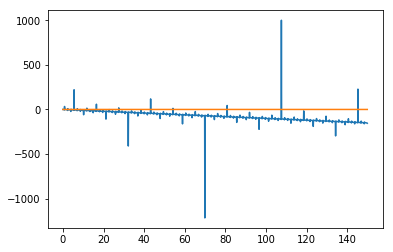

In [48]:
x = np.arange(0, 150, 0.1)
plt.plot(x, -np.tan(2 * x) - x, x, x-x)
plt.show()

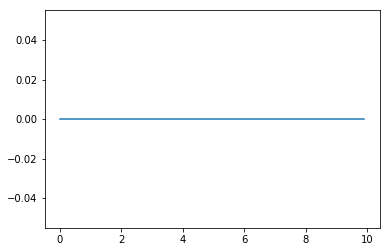

In [32]:
x = np.arange(0, 10, 0.1)
plt.plot(x, x - x)
plt.show()